## Grupo 2: An√°lisis de reservas y cancelaciones hoteleras: patrones y predicciones
üéØ Objetivo del proyecto
Analizar los datos de reservas de hoteles para comprender el perfil de los clientes, identificar patrones de comportamiento (estacionalidad, duraci√≥n de la estancia, precios) y estudiar los factores que influyen en las cancelaciones, utilizando herramientas de an√°lisis de datos en Python.

### 1. Introducci√≥n y descripci√≥n del dataset

- Breve explicaci√≥n del contexto del an√°lisis

- Descripci√≥n de las variables disponibles

- Objetivo del estudio

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('hotel_bookings.csv')

### 2. Perfil general de las reservas

Objetivo: Entender c√≥mo son las reservas y los clientes en general.

Inspeccionamos el dataset

In [7]:
print("--- Primeras 5 filas ---")
print(df.head())

print("\n--- Informaci√≥n general y tipos de datos ---")
df.info()

print("\n--- Resumen estad√≠stico de las columnas num√©ricas ---")
print(df.describe())

print("\n--- Cu√°ntos datos nulos hay ---")
print(df.isnull().sum())

print("\n--- Cu√°ntos duplicados hay ---")
print(df.duplicated().sum())

--- Primeras 5 filas ---
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ..

In [ ]:
# Llenar valores nulos
df['children'] = df['children'].fillna(0)
df['country'] = df['country'].fillna('Unknown')
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)

Analizamos el n√∫mero de clientes que llegan cada a√±o a los hoteles, diferenciando entre City Hotel y Resort Hotel. ¬øC√≥mo var√≠a la cantidad de clientes a lo largo de los a√±os en cada tipo de hotel?

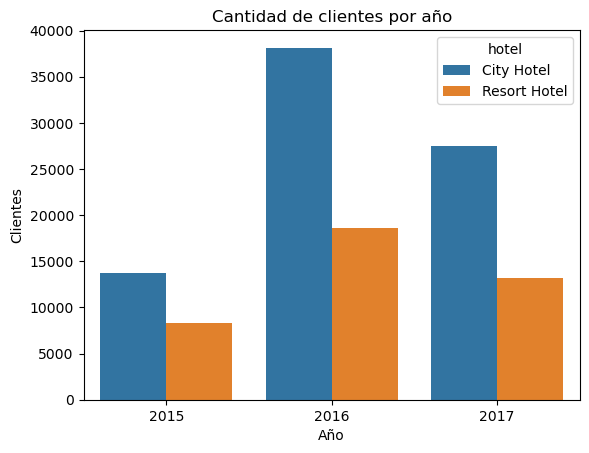

In [51]:
# Contar cu√°ntos clientes hay por a√±o de llegada y por tipo de hotel
clientes_hotel_anio = df.groupby(['arrival_date_year', 'hotel']).size().reset_index(name='cantidad_clientes')

# Crear un gr√°fico de barras
sns.barplot(data=clientes_hotel_anio, x='arrival_date_year', y='cantidad_clientes', hue='hotel')
plt.title('Cantidad de clientes por a√±o')
plt.xlabel('A√±o')
plt.ylabel('Clientes')
plt.show()

Analizamos de cu√°ntos pa√≠ses distintos eran los clientes que han hecho reservas en cada tipo de hotel (City Hotel y Resort Hotel)

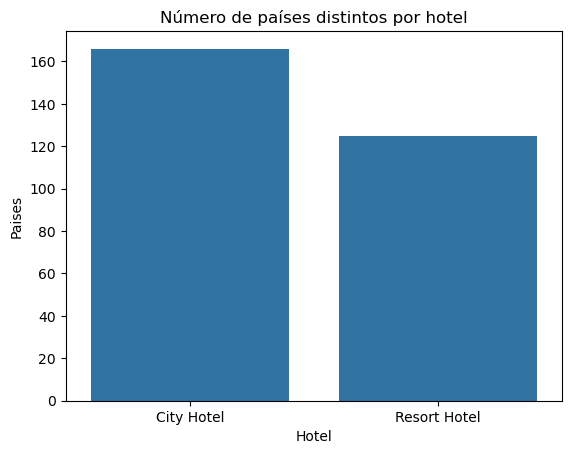

In [52]:
# Contar de cu√°ntos pa√≠ses distintos eran los clientes que han hecho reservas en cada tipo de hotel
num_paises = df.groupby('hotel')['country'].nunique()

sns.barplot(x=num_paises.index, y=num_paises.values)
plt.title('N√∫mero de pa√≠ses distintos por hotel')
plt.xlabel('Hotel')
plt.ylabel('Paises')
plt.show()

Analizamos para cada tipo de hotel (City Hotel y Resort Hotel), la cantidad de reservas provenientes de cada pa√≠s mediante un mapa coropl√©tico mundial. ¬øDe qu√© pa√≠ses provienen los clientes de cada hotel y cu√°les son los principales mercados de origen?

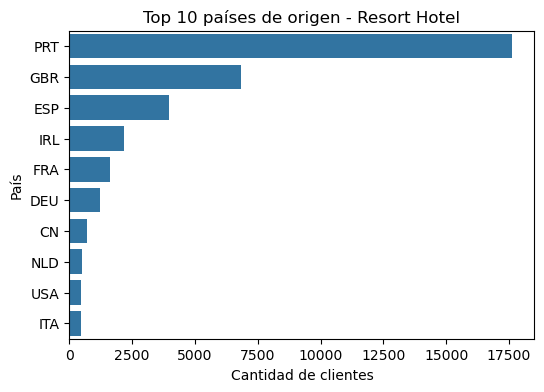

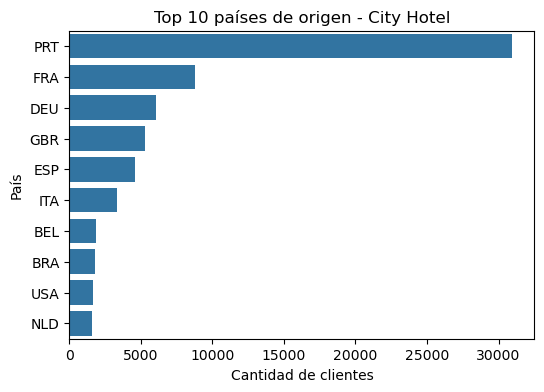

In [ ]:
for hotel in df['hotel'].unique():
    df_hotel = df[df['hotel'] == hotel]
    
    # Contar cu√°ntas reservas hay de cada pa√≠s en cada hotel y tomar los 10 primeros
    top_10 = df_hotel['country'].value_counts().head(10).reset_index()
    top_10.columns = ['country', 'cantidad_clientes']
    
    # Crear gr√°fico de barras
    plt.figure(figsize=(6,4))
    sns.barplot(data=top_10, x='cantidad_clientes', y='country')
    plt.title(f'Top 10 pa√≠ses de origen - {hotel}')
    plt.xlabel('Cantidad de clientes')
    plt.ylabel('Pa√≠s')
    plt.show()

In [ ]:
for hotel in df['hotel'].unique():
    # Contar cu√°ntas reservas provienen de cada pa√≠s en cada hotel
    reservas_hotel = df[df['hotel']==hotel]['country'].value_counts().reset_index()
    reservas_hotel.columns = ['country', 'reservas']
    
    # Crear un mapa coropl√©tico
    fig = px.choropleth(
        reservas_hotel,
        locations='country',
        color='reservas',
        color_continuous_scale='Oranges',
        title=f'Reservas por pa√≠s - {hotel}'
    )
    fig.show()

Analizamos la distribuci√≥n de los canales de reserva utilizados por los clientes. ¬øQu√© canales de reserva utilizan los clientes y cu√°l es la proporci√≥n de cada uno?

distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64


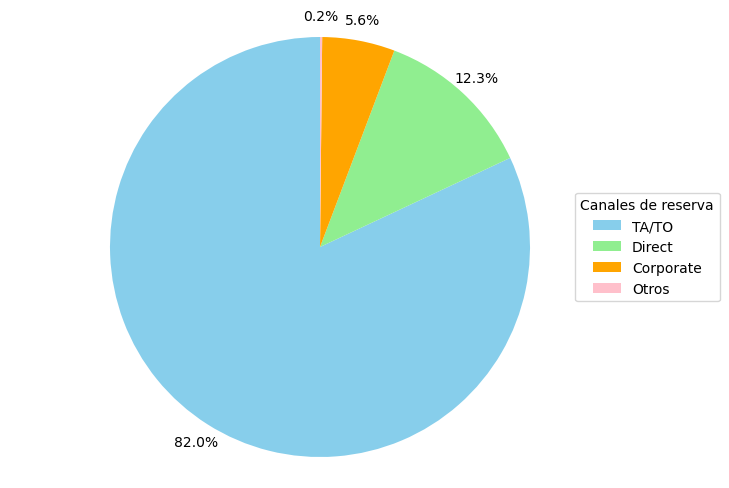

In [48]:
canales = df['distribution_channel'].value_counts()
print(canales)

# Umbral: menos del 5% se agrupa en 'Otros'
umbral = 0.05 * canales.sum()
canales_agrupados = canales.copy()
canales_agrupados[canales < umbral] = 0

otros = canales[canales < umbral].sum()
canales_agrupados = canales_agrupados[canales_agrupados>0]
canales_agrupados['Otros'] = otros

plt.figure(figsize=(8, 6))
# Crear gr√°fico circular
wedges, texts, autotexts = plt.pie(
    canales_agrupados.values,
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue','lightgreen','orange','pink'],
    pctdistance=1.1
)

# Agregar leyenda al lado
plt.legend(
    wedges,
    canales_agrupados.index,
    title="Canales de reserva",
    loc="center left",
    bbox_to_anchor=(0.9, 0, 0.5, 1)
)

plt.axis('equal')
plt.show()

### 3. Patrones de comportamiento y cancelaciones (Rodri)

Objetivo: Analizar c√≥mo var√≠an las reservas en funci√≥n del tiempo, los precios y la estancia.

Analizamos el n√∫mero de reservas por mes para determinar la estacionalidad. Tambi√©n analizamos el n√∫mero de cancelaciones por mes.
¬øEn qu√© meses hay m√°s reservas y cancelaciones?

=== RESUMEN COMPLETO (ORDENADO CRONOL√ìGICAMENTE) ===
                    Reservas  Porcentaje
arrival_date_month                      
January                 5929        4.97
February                8068        6.76
March                   9794        8.20
April                  11089        9.29
May                    11791        9.88
June                   10939        9.16
July                   12661       10.60
August                 13877       11.62
September              10508        8.80
October                11160        9.35
November                6794        5.69
December                6780        5.68


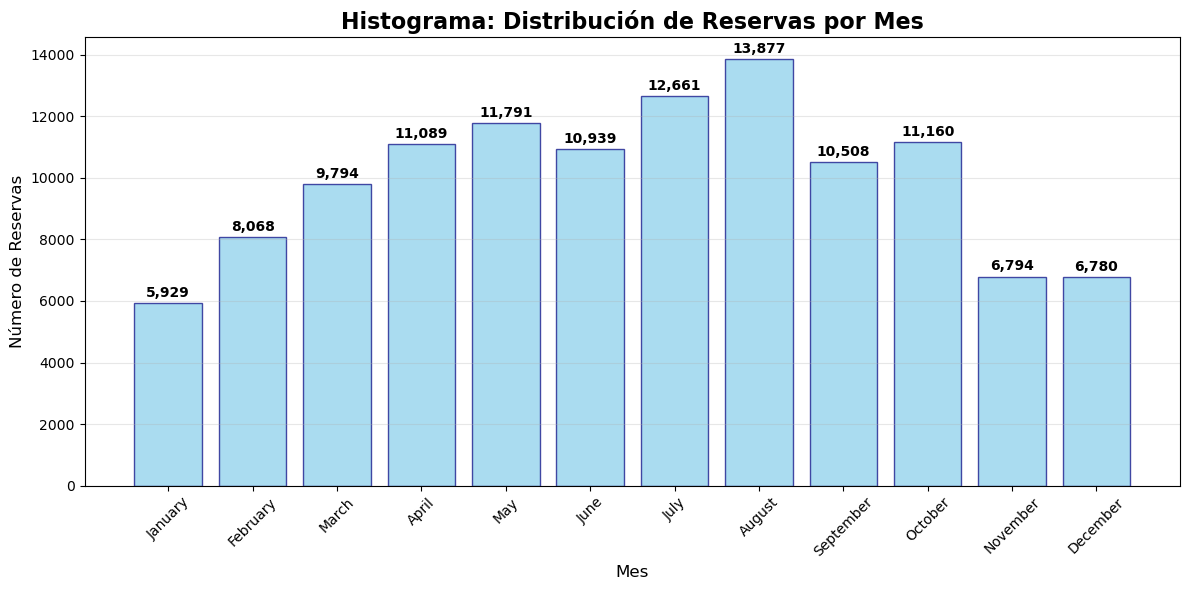

In [27]:
# An√°lisis de estacionalidad - Porcentaje de clientes por mes

# Contar reservas por mes
reservas_por_mes = df['arrival_date_month'].value_counts()

# Calcular porcentaje por mes
porcentaje_por_mes = (df['arrival_date_month'].value_counts(normalize=True) * 100).round(2)

# Crear una tabla m√°s visual ORDENADA por mes cronol√≥gico
resumen_mes = pd.DataFrame({
    'Reservas': reservas_por_mes,
    'Porcentaje': porcentaje_por_mes
})

# Definir el orden correcto de los meses
orden_meses = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Reordenar seg√∫n el orden cronol√≥gico de los meses
resumen_mes = resumen_mes.reindex(orden_meses)

print("=== RESUMEN COMPLETO (ORDENADO CRONOL√ìGICAMENTE) ===")
print(resumen_mes)

# Histograma de reservas por mes
plt.figure(figsize=(12, 6))
plt.bar(resumen_mes.index, resumen_mes['Reservas'], color='skyblue', edgecolor='navy', alpha=0.7)
plt.title('Histograma: Distribuci√≥n de Reservas por Mes', fontsize=16, fontweight='bold')
plt.xlabel('Mes', fontsize=12)
plt.ylabel('N√∫mero de Reservas', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# A√±adir valores en las barras
for i, v in enumerate(resumen_mes['Reservas']):
    plt.text(i, v + 100, f'{v:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

=== TASA DE CANCELACI√ìN POR MES ===
arrival_date_month
January      30.48
February     33.42
March        32.15
April        40.80
May          39.67
June         41.46
July         37.45
August       37.75
September    39.17
October      38.05
November     31.23
December     34.97
Name: is_canceled, dtype: float64


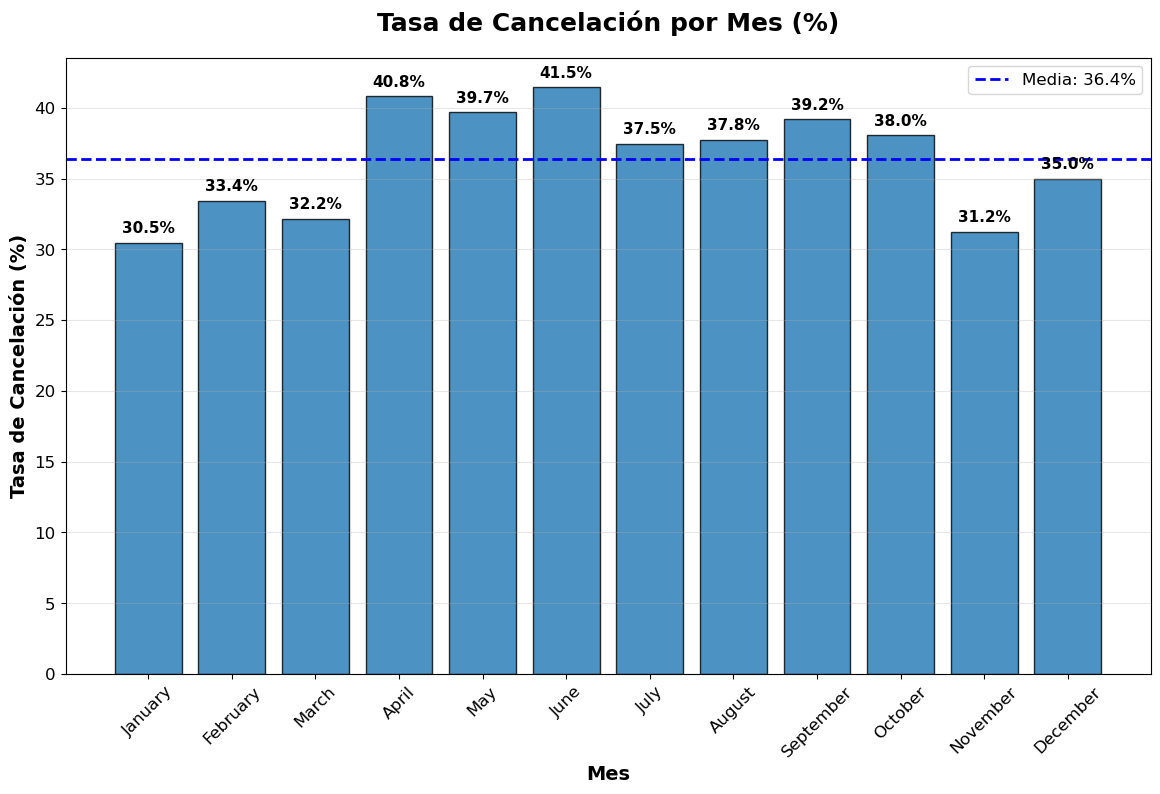

In [28]:
# Calcular tasa de cancelaci√≥n por mes (cancelaciones/total_reservas_del_mes), calculamos la tasa para que el resultado sea independiente del numero de cancelaciones
print("=== TASA DE CANCELACI√ìN POR MES ===")
tasa_cancelacion_mes = df.groupby('arrival_date_month')['is_canceled'].mean() * 100
tasa_cancelacion_ordenada = tasa_cancelacion_mes.reindex(orden_meses)
print(tasa_cancelacion_ordenada.round(2))

# Visualizaci√≥n de la tasa de cancelaci√≥n por mes
plt.figure(figsize=(14, 8))

bars = plt.bar(tasa_cancelacion_ordenada.index, tasa_cancelacion_ordenada.values, edgecolor='black', alpha=0.8)

plt.title('Tasa de Cancelaci√≥n por Mes (%)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Mes', fontsize=14, fontweight='bold')
plt.ylabel('Tasa de Cancelaci√≥n (%)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# A√±adir valores en las barras
for i, (mes, tasa) in enumerate(tasa_cancelacion_ordenada.items()):
    plt.text(i, tasa + 0.5, f'{tasa:.1f}%', ha='center', va='bottom', 
             fontweight='bold', fontsize=11)

# A√±adir l√≠nea de referencia con la media
media_cancelacion = tasa_cancelacion_ordenada.mean()
plt.axhline(y=media_cancelacion, color='blue', linestyle='--', linewidth=2, 
            label=f'Media: {media_cancelacion:.1f}%')

# A√±adir rejilla y leyenda
plt.grid(axis='y', alpha=0.3)
plt.legend(fontsize=12)
plt.show()

Analisis de la variacion del precio con los meses

=== ESTAD√çSTICAS DE PRECIOS POR TEMPORADA ===

Primavera:
  Precio promedio: $97.48

Verano:
  Precio promedio: $128.77

Oto√±o:
  Precio promedio: $90.87

Invierno:
  Precio promedio: $75.11


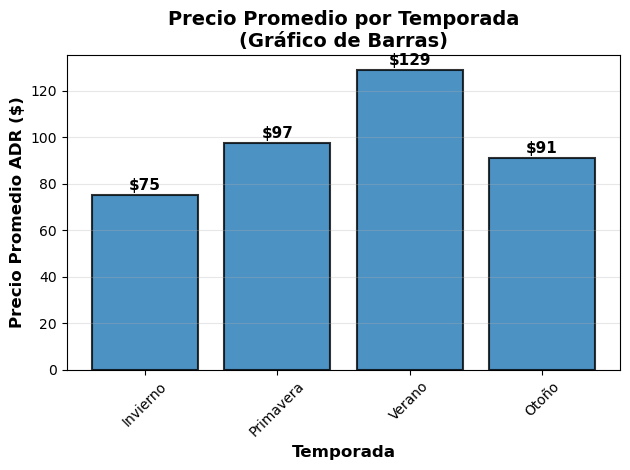


=== RANKING DE TEMPORADAS POR PRECIO PROMEDIO ===
1. Verano: $128.77
2. Primavera: $97.48
3. Oto√±o: $90.87
4. Invierno: $75.11


In [29]:
# Boxplot: Variaci√≥n de precios seg√∫n temporada

# Definir temporadas bas√°ndose en los meses
def categorizar_temporada(mes):
    if mes in ['December', 'January', 'February']:
        return 'Invierno'
    elif mes in ['March', 'April', 'May']:
        return 'Primavera'
    elif mes in ['June', 'July', 'August']:
        return 'Verano'
    else: 
        return 'Oto√±o'

# Crear columna de temporada
df['temporada'] = df['arrival_date_month'].apply(categorizar_temporada)

temporadas_ordenadas = ['Invierno', 'Primavera', 'Verano', 'Oto√±o']
datos_temporadas = [df[df['temporada'] == temp]['adr'] for temp in temporadas_ordenadas]

# Gr√°fico de barras con precio promedio
precio_promedio_temp = df.groupby('temporada')['adr'].mean().reindex(temporadas_ordenadas)
barras = plt.bar(temporadas_ordenadas, precio_promedio_temp.values, alpha=0.8 ,edgecolor='black', linewidth=1.5)

# A√±adir valores en las barras
for bar, valor in zip(barras, precio_promedio_temp.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'${valor:.0f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.title('Precio Promedio por Temporada\n(Gr√°fico de Barras)', fontsize=14, fontweight='bold')
plt.xlabel('Temporada', fontsize=12, fontweight='bold')
plt.ylabel('Precio Promedio ADR ($)', fontsize=12, fontweight='bold')
plt.tick_params(axis='x', rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()

# A√±adir estad√≠sticas por temporada
print("=== ESTAD√çSTICAS DE PRECIOS POR TEMPORADA ===")
for temp in ['Primavera', 'Verano', 'Oto√±o', 'Invierno']:
    precios_temp = df[df['temporada'] == temp]['adr']
    print(f"\n{temp}:")
    print(f"  Precio promedio: ${precios_temp.mean():.2f}")

plt.show()

# An√°lisis adicional: precio promedio por temporada
precio_por_temporada = df.groupby('temporada')['adr'].mean().sort_values(ascending=False)
print(f"\n=== RANKING DE TEMPORADAS POR PRECIO PROMEDIO ===")
for i, (temp, precio) in enumerate(precio_por_temporada.items(), 1):
    print(f"{i}. {temp}: ${precio:.2f}")

Analisis de la correlacion entre el precio y la tasa de cancelacion ¬øEl precio influye en la probabilidad de cancelaci√≥n?

In [30]:
# ¬øEl precio influye en la probabilidad de cancelaci√≥n?

print("=== AN√ÅLISIS: PRECIO vs CANCELACI√ìN ===")

# 1. Estad√≠sticas b√°sicas del precio (ADR - Average Daily Rate)
print("1. ESTAD√çSTICAS B√ÅSICAS DEL PRECIO")

print(f"Precio promedio general: ${df['adr'].mean():.2f}")
print(f"Precio mediano: ${df['adr'].median():.2f}")

# 2. Comparar precios entre reservas canceladas vs no canceladas
precio_canceladas = df[df['is_canceled'] == 1]['adr']
precio_no_canceladas = df[df['is_canceled'] == 0]['adr']

print(f"\nPrecio promedio - Reservas CANCELADAS: ${precio_canceladas.mean():.2f}")
print(f"Precio promedio - Reservas NO canceladas: ${precio_no_canceladas.mean():.2f}")
print(f"Diferencia: ${precio_canceladas.mean() - precio_no_canceladas.mean():.2f}")

# 4. Correlaci√≥n entre precio y cancelaci√≥n
print("\n" + "="*50)
print("2. CORRELACI√ìN PRECIO-CANCELACI√ìN")
correlacion = df['adr'].corr(df['is_canceled'])
print(f"Correlaci√≥n entre precio (ADR) y cancelaci√≥n: {correlacion:.4f}")

=== AN√ÅLISIS: PRECIO vs CANCELACI√ìN ===
1. ESTAD√çSTICAS B√ÅSICAS DEL PRECIO
Precio promedio general: $101.83
Precio mediano: $94.58

Precio promedio - Reservas CANCELADAS: $104.96
Precio promedio - Reservas NO canceladas: $99.99
Diferencia: $4.98

2. CORRELACI√ìN PRECIO-CANCELACI√ìN
Correlaci√≥n entre precio (ADR) y cancelaci√≥n: 0.0476


¬øLas cancelaciones var√≠an por tipo de hotel?

In [31]:
# Calcular cancelaciones por tipo de hotel
print("CANCELACIONES POR TIPO DE HOTEL")

# Cancelaciones absolutas por tipo
cancelaciones_por_tipo = df[df['is_canceled'] == 1]['hotel'].value_counts()
print("N√∫mero de cancelaciones por tipo:")
print(cancelaciones_por_tipo)

#  TASA DE CANCELACI√ìN por tipo (lo m√°s importante)
print("TASA DE CANCELACI√ìN POR TIPO (cancelaciones/total_reservas)")

tasa_por_tipo = df.groupby('hotel').agg({
    'is_canceled': ['count', 'sum', 'mean']
}).round(4)

# Simplificar nombres de columnas
tasa_por_tipo.columns = ['Total_Reservas', 'Total_Cancelaciones', 'Tasa_Cancelacion']
tasa_por_tipo['Tasa_Cancelacion_Pct'] = (tasa_por_tipo['Tasa_Cancelacion'] * 100).round(2)

print(tasa_por_tipo)

print("\n" + "="*60)

# 4. Interpretaci√≥n y comparaci√≥n
print("4. INTERPRETACI√ìN")
city_hotel_rate = tasa_por_tipo.loc['City Hotel', 'Tasa_Cancelacion_Pct']
resort_hotel_rate = tasa_por_tipo.loc['Resort Hotel', 'Tasa_Cancelacion_Pct']

diferencia = abs(city_hotel_rate - resort_hotel_rate)
print(f"City Hotel - Tasa de cancelaci√≥n: {city_hotel_rate}%")
print(f"Resort Hotel - Tasa de cancelaci√≥n: {resort_hotel_rate}%")
print(f"Diferencia: {diferencia:.2f} puntos porcentuales")

if city_hotel_rate > resort_hotel_rate:
    print(f"‚Üí Los CITY HOTELS tienen {diferencia:.2f}% M√ÅS cancelaciones que los Resort Hotels")
elif resort_hotel_rate > city_hotel_rate:
    print(f"‚Üí Los RESORT HOTELS tienen {diferencia:.2f}% M√ÅS cancelaciones que los City Hotels")
else:
    print("‚Üí Ambos tipos de hotel tienen tasas de cancelaci√≥n similares")

CANCELACIONES POR TIPO DE HOTEL
N√∫mero de cancelaciones por tipo:
hotel
City Hotel      33102
Resort Hotel    11122
Name: count, dtype: int64
TASA DE CANCELACI√ìN POR TIPO (cancelaciones/total_reservas)
              Total_Reservas  Total_Cancelaciones  Tasa_Cancelacion  \
hotel                                                                 
City Hotel             79330                33102            0.4173   
Resort Hotel           40060                11122            0.2776   

              Tasa_Cancelacion_Pct  
hotel                               
City Hotel                   41.73  
Resort Hotel                 27.76  

4. INTERPRETACI√ìN
City Hotel - Tasa de cancelaci√≥n: 41.73%
Resort Hotel - Tasa de cancelaci√≥n: 27.76%
Diferencia: 13.97 puntos porcentuales
‚Üí Los CITY HOTELS tienen 13.97% M√ÅS cancelaciones que los Resort Hotels


### 4. Predicci√≥n y recomendaciones

Objetivo: Explorar qu√© factores est√°n m√°s relacionados con las cancelaciones y proponer conclusiones pr√°cticas.

### 5. Conclusiones

- Principales hallazgos

- Reflexiones sobre el comportamiento de los usuarios

- Posibles recomendaciones para retenci√≥n